In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
# specify the folder
folder_path = 'IRFs'

# list all files in the folder
files = os.listdir(folder_path)

# filter files ending with .asc
asc_files = [file for file in files if file.endswith('.asc')]

# print the list of .asc files
print(len(asc_files))

89


In [8]:
irfs = []

for asc in asc_files:
    # load the data
    data = np.genfromtxt(os.path.join(folder_path, asc), skip_footer=1, skip_header=10)
    
    if len(data) != 4096:
        x = np.linspace(0, 1, len(data))
        x_new = np.linspace(0, 1, 4096)
        data = np.interp(x_new, x, data)
        
    irfs.append(data)

In [9]:
irfs_array = np.array(irfs)
print(np.shape(irfs_array))

(89, 4096)


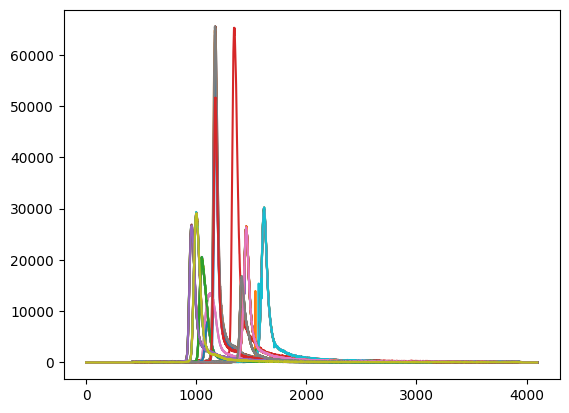

In [14]:
for j in range(len(asc_files)):
    plt.plot(irfs_array[j], label=asc_files[j])

In [15]:
np.save('irfs_samples.npy', irfs_array)